In [2]:
import os
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:
dataset = 'cifar100'
architecture = 'ResNet20-4'
results_folder = 'results'
folder_name = f"data_{dataset}_arch_{architecture}"

In [4]:
correlation_folder = results_folder+'/correlation/'+folder_name+'/'

scores = defaultdict(lambda: [0,0])
for i, filename in enumerate(os.listdir(correlation_folder)):
    # psnr scores
    if filename[-6:] == "NR.npy":
        print("psnr:", filename)
        scores[filename.split("_")[0]][0] = float(np.load(correlation_folder+filename))
        
    # privacy scores
    if filename[-6:] == "re.npy":
        print("privacy:", filename)
        scores[filename.split("_")[0]][1] = float(np.load(correlation_folder+filename))
        print(float(np.load(correlation_folder+filename)))
        
scores

psnr: 0-25-11_attack_PSNR.npy
privacy: 0-25-11_privacy_score.npy
0.3469004712562779
psnr: 1-48-14_attack_PSNR.npy
privacy: 1-48-14_privacy_score.npy
0.31949877895510115
psnr: 10-11-28_attack_PSNR.npy
privacy: 10-11-28_privacy_score.npy
0.3438814804525143
psnr: 10-14_attack_PSNR.npy
privacy: 10-14_privacy_score.npy
0.34244882035488106
psnr: 10-9-23_attack_PSNR.npy
privacy: 10-9-23_privacy_score.npy
0.41173335725111854
psnr: 11-41-18_attack_PSNR.npy
privacy: 11-41-18_privacy_score.npy
0.3285601605345748
psnr: 12-24-35_attack_PSNR.npy
privacy: 12-24-35_privacy_score.npy
0.3975328820071147
psnr: 12-31-1_attack_PSNR.npy
privacy: 12-31-1_privacy_score.npy
0.3301433954304127
psnr: 12-38-29_attack_PSNR.npy
privacy: 12-38-29_privacy_score.npy
0.3536599396557596
psnr: 13-17-43_attack_PSNR.npy
privacy: 13-17-43_privacy_score.npy
0.4001009023344478
psnr: 13-24-47_attack_PSNR.npy
privacy: 13-24-47_privacy_score.npy
0.35207263530388905
psnr: 13-33-13_attack_PSNR.npy
privacy: 13-33-13_privacy_score.n

defaultdict(<function __main__.<lambda>()>,
            {'0-25-11': [11.416992330551148, 0.3469004712562779],
             '1-48-14': [10.01922674179077, 0.31949877895510115],
             '10-11-28': [10.076666951179504, 0.3438814804525143],
             '10-14': [10.130367517471313, 0.34244882035488106],
             '10-9-23': [8.678024101257325, 0.41173335725111854],
             '11-41-18': [10.914607286453247, 0.3285601605345748],
             '12-24-35': [8.34292287826538, 0.3975328820071147],
             '12-31-1': [11.801437616348267, 0.3301433954304127],
             '12-38-29': [11.025617551803588, 0.3536599396557596],
             '13-17-43': [8.063097667694091, 0.4001009023344478],
             '13-24-47': [10.667288064956665, 0.35207263530388905],
             '13-33-13': [10.074288392066956, 0.4080409977326894],
             '13-5-9': [9.58318076133728, 0.41367532333195894],
             '14-1-6': [10.364734768867493, 0.32243407336369123],
             '14-28-9': [9.558

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


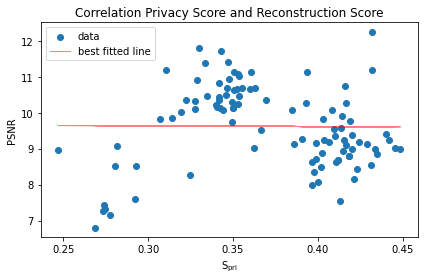

In [5]:
fig, ax = plt.subplots()

psnrs = [a[0] for a in scores.values()]
privs = [a[1] for a in scores.values()]


# ax.set_ylim(8, 10)
# ax.set_xlim(0.3, 0.5)

ax.set_ylabel("PSNR")
ax.set_xlabel("$\mathregular{S_{pri}}$")

ax.set_xticks([0.25, 0.3, 0.35, 0.4, 0.45, 0.5])

ax.set_title("Correlation Privacy Score and Reconstruction Score")

ax.scatter(privs, psnrs, label='data')

m, b = np.polyfit(privs, psnrs, 1)
ax.plot(privs, m*np.array(privs) + b, color='red', linewidth=1, alpha=0.5, label='best fitted line')

plt.tight_layout()
plt.legend()
plt.savefig("./visualisations/graphs/correlation.eps", format='eps', dpi=1000)
plt.show()

In [6]:
len(scores)

100